In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [86]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fdist","class"]
df=pd.read_csv("magic04.data",names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [87]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


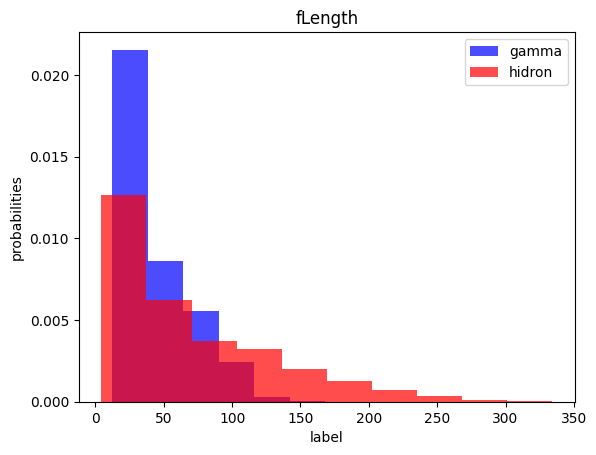

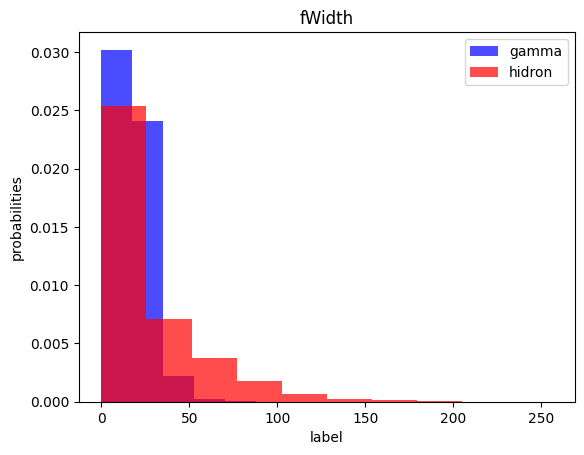

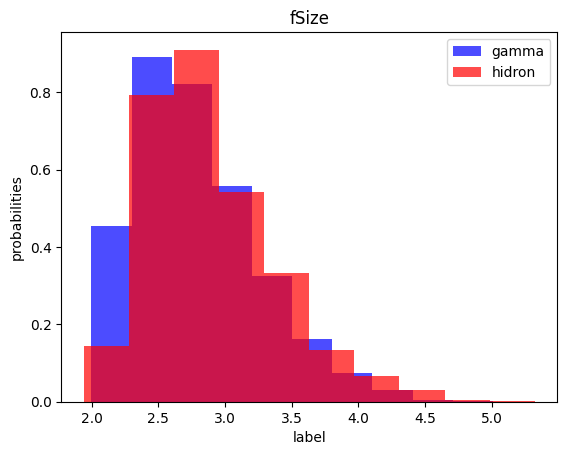

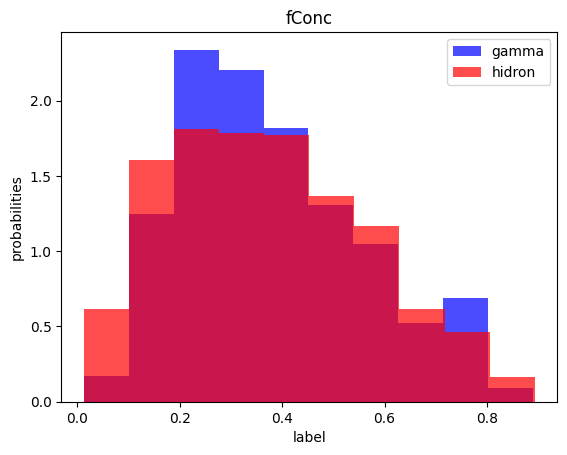

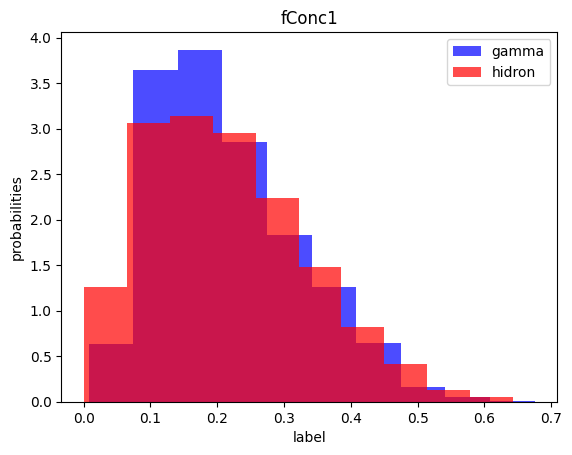

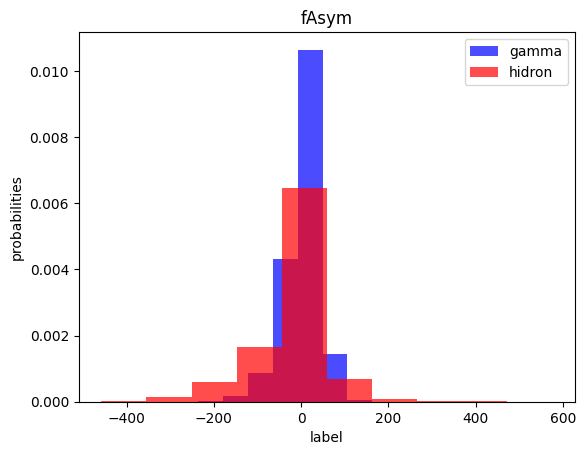

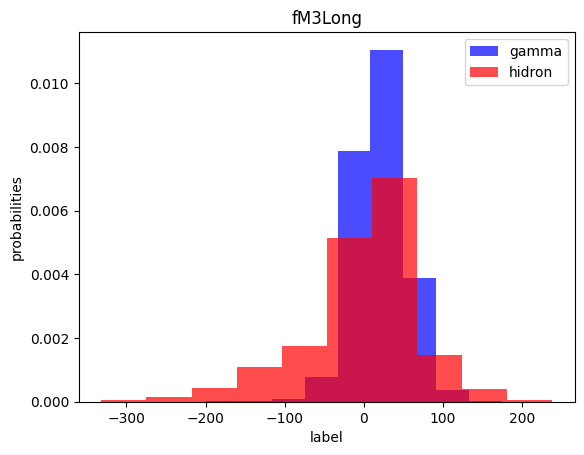

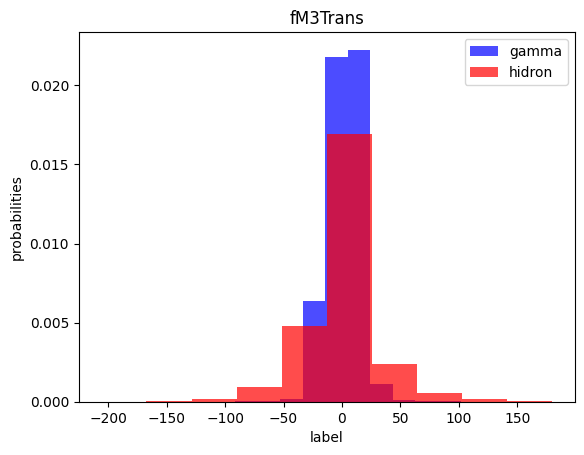

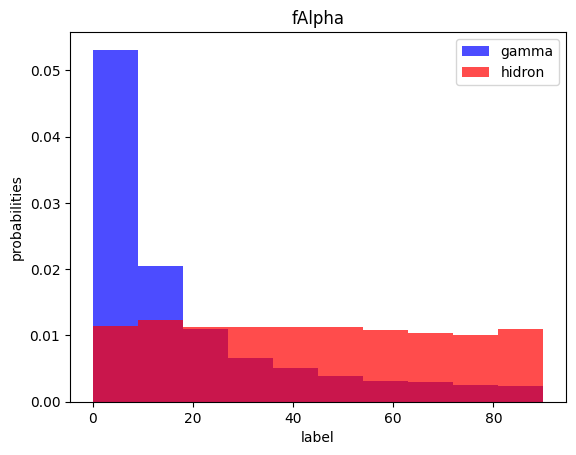

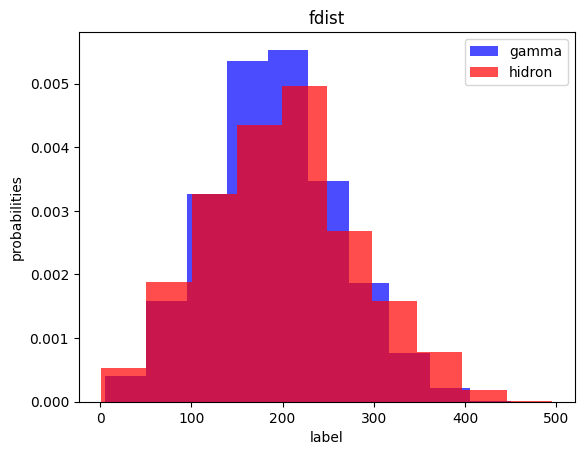

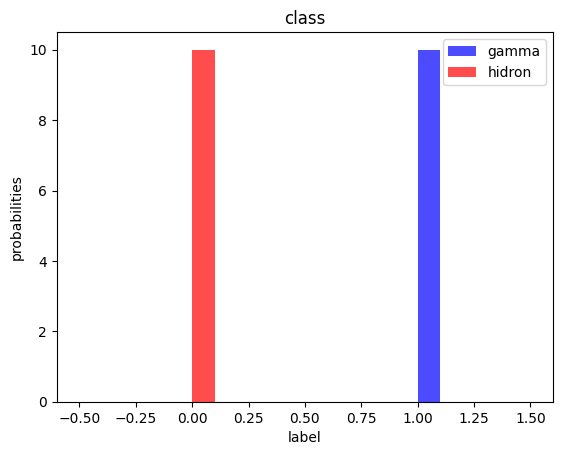

In [88]:
for label in cols:
  plt.hist(df[df['class']==1][label],color = 'blue', label = 'gamma', alpha = 0.7,density = True )
  plt.hist(df[df['class']==0][label],color = 'red', label = 'hidron', alpha = 0.7,density = True )

  plt.title(label)
  plt.ylabel("probabilities")
  plt.xlabel('label')
  plt.legend()
  plt.show()

In [107]:
train,valid,test = np.split(df.sample(frac = 1),[int( 0.6*len(df)), int(0.8*len(df))])


In [109]:
def scale_data(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scalar = StandardScaler()
  X = scalar.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y


In [110]:
train, train_X, train_y =  scale_data(train, oversample= True)
valid, valid_X, valid_y =  scale_data(valid, oversample= False)
test, test_X, test_y =  scale_data(test, oversample= False)

#k-Nearest Neighbors

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


#for k =1

In [136]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [128]:
y_pred = knn_model.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1311
           1       0.85      0.88      0.87      2493

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [137]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [138]:
test_y

array([1, 0, 0, ..., 1, 1, 0])

#for k =3

In [139]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [140]:
y_pred = knn_model.predict(test_X)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1311
           1       0.87      0.85      0.86      2493

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# for K = 5

In [143]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_X, train_y)

KNeighborsClassifier()

In [144]:
y_pred = knn_model.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1311
           1       0.87      0.86      0.87      2493

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.82      0.83      3804



#Overall the accuracy is same when k=1,3,5.